In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loading CSVs

In [1]:
df = pd.read_csv('C:/Users/XavJ0/Documents/CX_Mentorship/CX_Net_generation_United_States_all_sectors_monthly.csv')

NameError: name 'pd' is not defined

In [ ]:
df = df[['Month', 'total_fuels_MWh', 'coal_MWh', 'natural gas thousand megawatthours', 'nuclear thousand megawatthours', 'conventional hydroelectric thousand megawatthours']]
df.columns = ['date', 'total_fuels_MWh', 'coal_MWh','natural_gas_MWh', 'nuclear_MWh', 'hydroelectric_MWh']

In [ ]:
#convert 'date' from object(string) to datetime
df['date'] = pd. to_datetime(df['date']) 

In [ ]:
df_total = df[['date', 'total_fuels_MWh']]
df_total.columns = ['ds', 'y']

In [ ]:
df_total.head()

,ds,y
0,2001-01-01,332493160.0
1,2001-02-01,282940198.0
2,2001-03-01,300706544.0
3,2001-04-01,278078871.0
4,2001-05-01,300491621.0


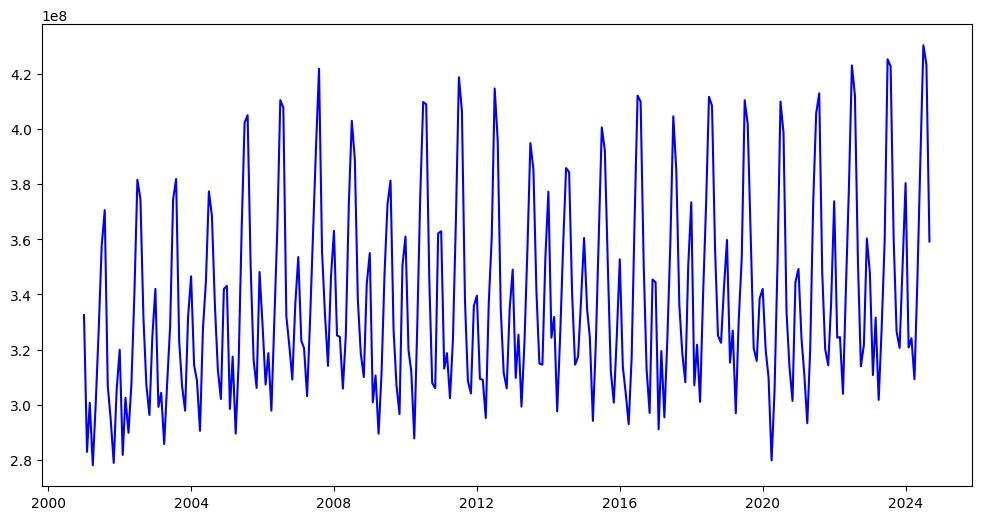

In [ ]:
#first create a matpotlib graph with date on the x axis and total_fuels on the y
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['total_fuels_MWh'], label='Total Fuels (MWh)', color='blue')

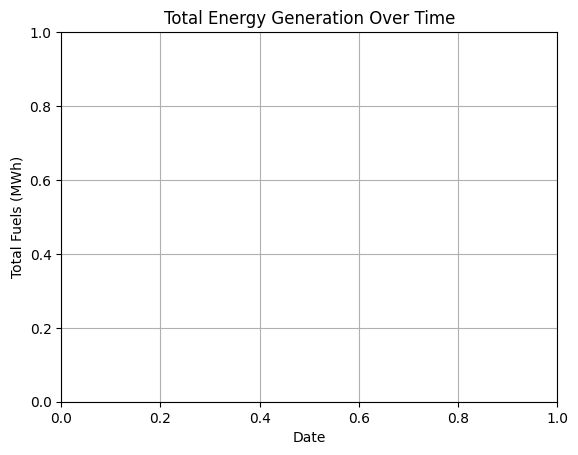

In [ ]:
plt.xlabel('Date')
plt.ylabel('Total Fuels (MWh)')
plt.title('Total Energy Generation Over Time')
plt.grid(True)

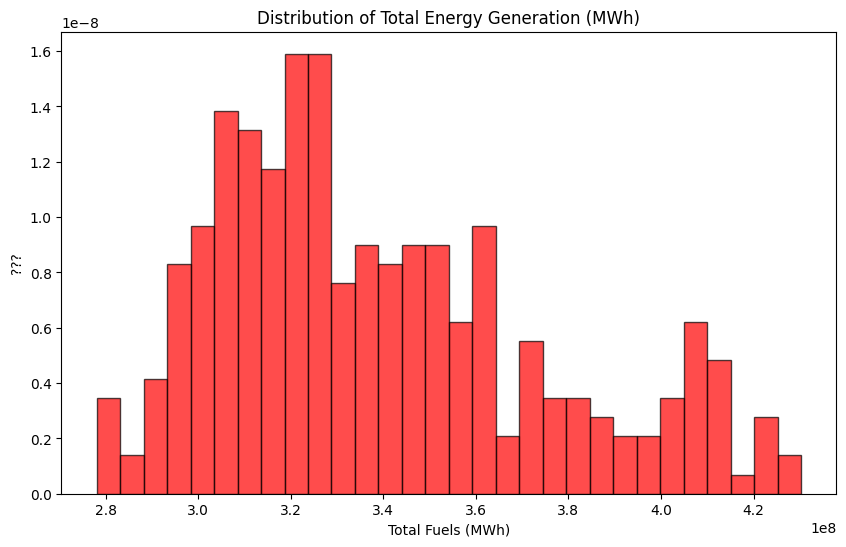

In [ ]:
#create a histogram distribution (matplotlib) of y (for continuous values) ask chatgpt that.  Should look like a bell curve
plt.figure(figsize=(10,6))
plt.hist(df['total_fuels_MWh'], bins=30, color='red', edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Total Fuels (MWh)')
plt.ylabel('???')
plt.title('Distribution of Total Energy Generation (MWh)')
plt.show()

In [ ]:
#statstics metrics like mean median mode, std, etc.
mean=df_total.mean()
med=df_total.median()
mode=df_total.mode()
stdev=df_total.std()
print(f"Mean: {mean}")
print(f"Median: {med}")
print(f"Standard Deviation: {mode}")
print(f": {stdev}")

Mean: ds    2012-10-31 01:05:41.052631552
y                   338762769.63614
dtype: object
Median: ds    2012-11-01 00:00:00
y             330615570.0
dtype: object
Standard Deviation:             ds            y
0   2001-01-01  278078871.0
1   2001-02-01  278933942.0
2   2001-03-01  279846213.8
3   2001-04-01  281825712.0
4   2001-05-01  282940198.0
..         ...          ...
280 2024-05-01  422681773.8
281 2024-06-01  422974982.5
282 2024-07-01  423354768.8
283 2024-08-01  425220301.6
284 2024-09-01  430287610.6

[285 rows x 2 columns]
: ds    2508 days 13:04:21.414679456
y                  35430747.655839
dtype: object


In [ ]:
#are there any NaN values?  
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      285 non-null    datetime64[ns]
 1   y       285 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


There are no NaN values

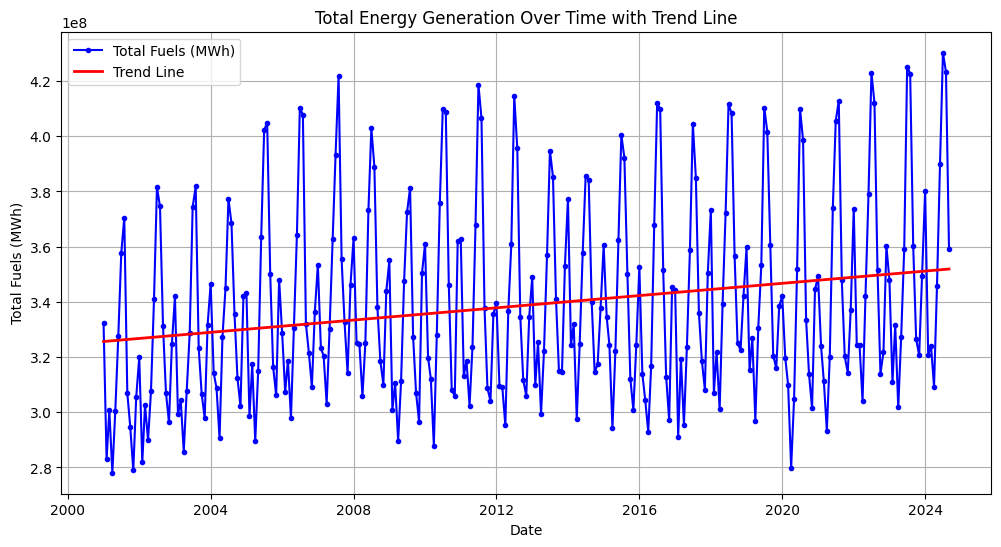

In [ ]:
#add a trend line to your matplotlib graph
# Sort values by date to ensure proper plotting
df = df.sort_values(by='date')

# Convert dates to numerical values for regression 
df['date_ordinal'] = df['date'].map(lambda x: x.toordinal())

# Fit a linear trend line 
trend = np.polyfit(df['date_ordinal'], df['total_fuels_MWh'], 1)
trend_line = np.poly1d(trend)

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['total_fuels_MWh'], label='Total Fuels (MWh)', linestyle='-', marker='o', markersize=3, color='blue')

plt.plot(df['date'], trend_line(df['date_ordinal']), color='red', linewidth=2, label='Trend Line')

plt.xlabel('Date')
plt.ylabel('Total Fuels (MWh)')
plt.title('Total Energy Generation Over Time with Trend Line')
plt.legend()
plt.grid(True)

plt.show()

This is a linear trend line